# Exploratory Analysis

The purpose of this analysis is to get a feel for the trends in this text data, such as which words appear consistently the most common across the datasets, and how these various texts might reasonably be categorized. As such, the first task will be to visualize the most frequent words within these various datasets through the generation of word-clouds.

## Generating Word-Clouds

For this I'm using the WordCloud python package for MatPlotLib.pyplot. First, I'll be generating a list of total word frequencies for each corpus I want to generate a word-cloud for. I'll be doing two wordclouds for each data source, one generated from titles, and one generated from text.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
#DataFrames

#Starting with Worldnews, the largest dataset.
worldnews_text_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0)
worldnews_title_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/title.csv',index_col=0)

#Now let's add in Ground News, which has the most interesting metadata.
groundnews_title_c = pd.read_csv('../data/wdms/count/groundnews/lemmed/title.csv',index_col=0)
groundnews_text_c = pd.read_csv('../data/wdms/count/groundnews/lemmed/source.csv',index_col=0)

#And finally, NewsAPI.
news_title_c = pd.read_csv('../data/wdms/count/newsapi/lemmed/title.csv',index_col=0)
news_text_c = pd.read_csv('../data/wdms/count/newsapi/lemmed/content.csv',index_col=0)



C:\Users\Owner\AppData\Local\Temp\ipykernel_232744\3535502304.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  worldnews_text_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0)
C:\Users\Owner\AppData\Local\Temp\ipykernel_232744\3535502304.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  worldnews_title_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/title.csv',index_col=0)


In [9]:
#An example word-document matrix. This comes from WorldNewsApi's text column.
worldnews_text_c.head()

,authors,country,sentiment,url,said,transgender,people,woman,school,gender,...,products,methodology,studentathlete,coal,fetus,midterm,cofe,coincided,preservation,refuted
0,DASHA LITVINOVA,us,0.311,https://apnews.com/article/russia-lgbtq-crackd...,0,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Daniel Yo-Ling,us,0.134,https://thediplomat.com/2023/11/where-do-trans...,0,38,9,6,0,15,...,0,0,0,0,0,0,0,0,0,0
2,Deneen Broadnax,us,0.12,https://worldnewsera.com/news/science/transgen...,0,36,21,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,Deeksha Teri,in,0.06,https://indianexpress.com/article/education/cl...,5,31,2,0,12,12,...,0,0,0,0,0,0,0,0,0,0
4,Lois Kirkup,ca,0.481,https://ottawacitizen.com/news/local-news/phot...,0,35,35,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
news_title_c.head()

,author,publishedAt,source,url,urlToImage,transgender,trans,gender,care,ban,...,lost,mark,net,medium,men,mmwr,month,named,national,licenses
0,Grace Dean,2024-01-29T14:33:43Z,business-insider,https://www.businessinsider.com/new-york-resta...,https://i.insider.com/65b796ba6c8f0a134f7aa55e...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Kiara Alfonseca, Lilia Geho",2024-01-24T20:16:13Z,abc-news,https://abcnews.go.com/US/ohio-senate-override...,https://i.abcnewsfe.com/a/46d2385c-3cff-40a4-9...,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Megan Janetsky / AP,2024-01-16T04:15:00Z,time,https://time.com/6555824/transgender-lgbt-kill...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AMY BETH HANSON / AP,2024-01-31T16:25:37Z,time,https://time.com/6590528/utah-joins-states-reg...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PAT EATON-ROBB / AP,2024-01-25T20:04:28Z,time,https://time.com/6588724/transgender-veterans-...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Preparing the WorldNews dataFrames for the creation of Word-Clouds. Creating a running total count of word frequency and returning
#A numeric Series of the 100 most frequent words, indexed by word, and containing frequency. We can use this to build the word-cloud.
dfs=[worldnews_title_c,worldnews_text_c]
wc_sums=[]
titles=['WorldNewsAPI (Title)','WorldNewsAPI (Text)']

for df in dfs:
    df.iloc[:,4:]=df.iloc[:,4:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,4:].sum()[:100]]
    
#Same for GroundNews
dfs=[groundnews_title_c,groundnews_text_c]
titles+=['GroundNews (Title)','GroundNews (Text)']

for df in dfs:
    df.iloc[:,5:]=df.iloc[:,5:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,5:].sum()[:100]]

#Finally, same for NewsAPI
#Same for GroundNews
dfs=[news_title_c,news_text_c]
titles+=['NewsAPI (Title)','NewsAPI (Text)']

for df in dfs:
    df.iloc[:,5:]=df.iloc[:,5:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,5:].sum()[:100]]


# Generating the WordClouds

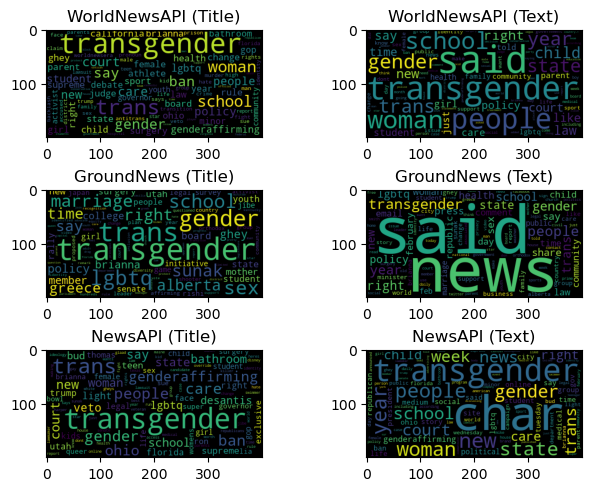

In [12]:
#Making Word Clouds from the Various News Sources.
wordclouds = [WordCloud().generate_from_frequencies(sums) for sums in wc_sums]
fig,ax=plt.subplots(3,2,constrained_layout = True)
for i in range(3):
    for j in range(2):
        ax[i,j].imshow(wordclouds[2*i+j])
        ax[i,j].set_title(titles[2*i+j])

# First Thoughts

In all three data sources, we appeared to get much stronger results by looking at the title than by looking at the text. This is likely because of the presence of specific 'semi-stop' words which don't convey the prime meaning of the story, but nevertheless occur often in a news article. These are words like ***news*** and ***said***, which are very prominent in the web-scraped Ground News source text, along with time-words such as *day, week, month, year*, etc. 

### Some other thoughts:

* The GroundNews Text appears to be the weakest in terms of strong meaning conveyed by the WordCloud.
    * This makes sense as it was scraped from websites with disparate HTML sources.
* NewsAPI's Text contains an odd most popular word, **char**, which I can't really explain the presence of. 
    * This text came from an API and wasn't scraped, so the text content should contain only the actual text. I wonder if this is due to an encoding error on python's part.
* Since the topic is ***Transgender***, it seems a good test of text quality that the most popular word in the wordcloud is, in fact, *transgender*. This is true for all three *Title* data-sets, so I'll work with them primarily.
    * This trend may not hold for TFIDF analysis. I'll keep using a variety of text datasets, as long as I have them available. But we're testing the titles first and foremost.

# TFIDF WordClouds

Now that I've seen the base frequencies of words in each dataset, it's worth checking to see if there are distinctions within datasets based on pre-existing labels. Both the WorldNewsAPI dataset and the GroundNews dataset come with pre-existing labels for each document. WorldNewsApi provides a **sentiment** metric between 0 and 1 for each document, and the documents can be categorized based on their sentiment score.

GroundNews comes with a rather interesting pre-existing label of **Bias**, which gives the general political bias of the News source on a scale from **Right** (*Republican*) to **Left** (*Democrat*). We can categorize these stories based on the given Bias.

Once we've separated the words into categories, we can create a TFIDF word-cloud by comparing the relative word-frequencies in these corpi with the overall word frequencies.

In [13]:
#TFIDF DataFrames
#Starting with Worldnews, the largest dataset.
worldnews_text_t = pd.read_csv('../data/wdms/tfidf/worldnewsapi/lemmed/text.csv',index_col=0)
worldnews_title_t = pd.read_csv('../data/wdms/tfidf/worldnewsapi/lemmed/title.csv',index_col=0)

text_wdm = worldnews_text_t.iloc[:,4:].astype(float)
title_wdm = worldnews_text_t.iloc[:,4:].astype(float)

worldnews_title_t['sentiment'].astype(float).describe()

count    3100.000000
mean        0.218057
std         0.170946
min         0.000000
25%         0.084000
50%         0.181000
75%         0.314250
max         1.000000
Name: sentiment, dtype: float64

In [14]:
# I'm going to cut the sentiment scores into 4 categories based on the quartile they're in.
worldnews_title_t['sentiment_cat']=pd.cut(worldnews_title_t['sentiment'],bins=[0,.084,.181,.31425,1],labels=['worst','bad','good','best'])
worldnews_title_t[['sentiment_cat','sentiment']].head()

,sentiment_cat,sentiment
0,good,0.311
1,bad,0.134
2,bad,0.120
3,worst,0.060
4,best,0.481


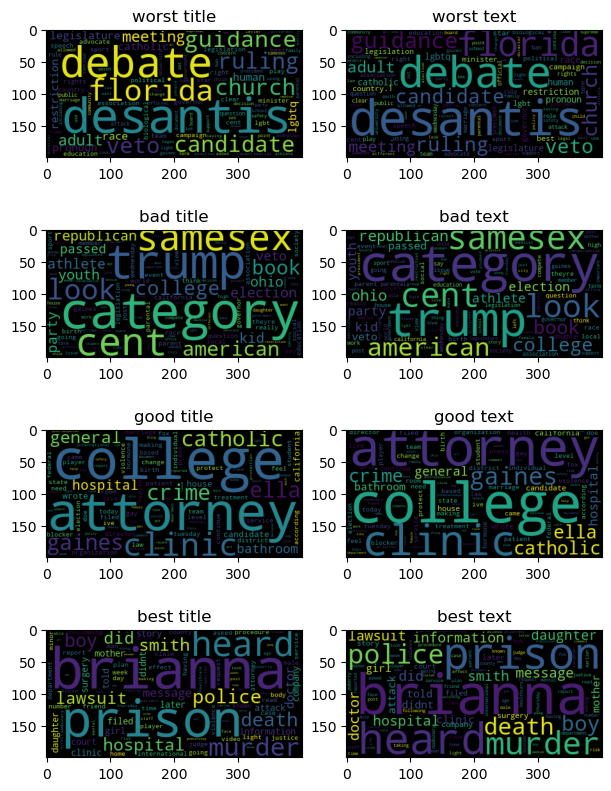

In [53]:
#Now we can make the WordClouds. I tried the raw numbers but didn't get much distinction between sentiment levels so I decided
#To run another TFIDF-esque algorithm to capture the different word frequencies in each sentiment level.
fig,ax=plt.subplots(4,2,figsize=(6,8),constrained_layout = True)
labels= ['worst','bad','good','best']
titles=['title','text']
wdms=[title_wdm,text_wdm]
wc_sums=pd.DataFrame(columns=text_wdm.columns)
for l in labels:
    for wdm in wdms:
        wc_sums.loc[len(wc_sums.index)]=wdm[worldnews_title_t['sentiment_cat']==l].sum()
# Divide the dataframe by the mean to get the relative frequencies of each word at each sentiment level compared to the
# avarege frequency.
wc_sums = wc_sums/wc_sums.mean()
wordclouds=[]
for i in range(8):
    sums = wc_sums.iloc[i,:].sort_values(ascending=False)[:100]
    wordclouds += [WordCloud().generate_from_frequencies(sums)]
#Build the WordClouds
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(wordclouds[2*i+j])
        ax[i,j].set_title(labels[i]+' '+titles[j])

# Thoughts

Interesting. Now we can see some distinct events emerging for each categorical level of sentiment. However, I don't think the sentiment score given by this news API is entirely accuate, given that ***murder***, ***prison*** and ***death*** are some of the top words in the 'Best' sentiment category. Actually, this story is one of the worst  incidents related to transgender individuals that I've heard of in my research, the murder of a teenager named Brianna Ghey. I don't know how the API got that so horribly wrong, but it's a good warning to be very careful when trying to categorize data. Computers are good at picking up distinctions, but they don't know the semantics of the categories they make, and it's up to the data scientists to make sure the categories actually mean what we think they mean.

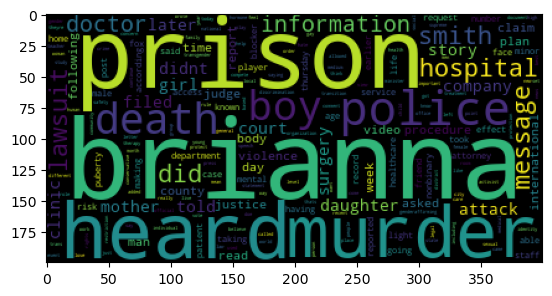

In [16]:
#Sanity Check to see if the Brianna Ghey killing is really is scored as 'highest' sentiment by my News API
plt.imshow(
    WordCloud().generate_from_frequencies(text_wdm[worldnews_title_t['sentiment_cat']=='best'].sum()/text_wdm.sum())
)

#Yup, it seems the API just got this story horribly wrong in terms of sentient.

In [48]:
#Importing Ground News DataFrames to see the difference between the bias categories.
gn_text = pd.read_csv('../data/wdms/tfidf/groundnews/lemmed/summ.csv',index_col=0).dropna(subset='factuality')
labels = ['Left','Lean Left','Center','Lean Right','Right','Far Right']
gn_text.head()

,bias,factuality,owner,source,owner_type,transgender,state,gender,sex,school,...,gov,law,group,legalize,ghey,conservative,game,survey,health,vote
0,Center,High Factuality,Government of the United Kingdom,https://www.bbc.co.uk/news/world-europe-683101...,Government,0.0,0.0,0.0,0.347300,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.222268
1,Lean Left,Mixed Factuality,Scott Trust Limited,https://www.theguardian.com/world/2024/feb/15/...,Independent,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,Lean Left,High Factuality,The Hindu Group,https://www.thehindu.com/news/international/gr...,Independent,0.0,0.0,0.0,0.171174,0.0,...,0.0,0.213044,0.0,0.000000,0.0,0.210252,0.0,0.0,0.0,0.000000
3,Center,High Factuality,Bell Media,https://www.ctvnews.ca/world/greece-becomes-fi...,Media Conglomerate,0.0,0.0,0.0,0.217222,0.0,...,0.0,0.000000,0.0,0.286687,0.0,0.000000,0.0,0.0,0.0,0.000000
4,Lean Left,Mixed Factuality,Evgeny Lebedev,https://www.independent.co.uk/news/world/europ...,Individual,0.0,0.0,0.0,0.269154,0.0,...,0.0,0.000000,0.0,0.355226,0.0,0.000000,0.0,0.0,0.0,0.000000


GroundNews assigns one of seven bias categories to each news story:

    * Far Left
    * Left
    * Lean Left
    * Center
    * Lean Right
    * Right
    * Far Right

These measures are based on the general political bias of the organization which published the story, which is continuously monitored and updated by the staff at Ground News.

This collection of articles only contains 6: Left to Far Right.

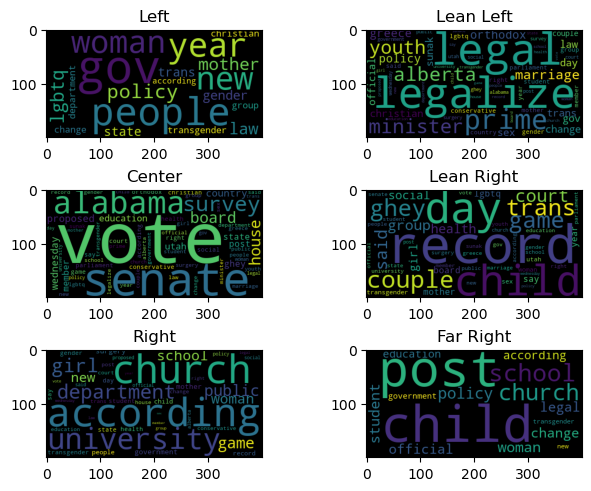

In [51]:
wdm=gn_text.iloc[:,5:].astype(float)
wc_sums=pd.DataFrame(columns=wdm.columns)

for l in labels:
    wc_sums.loc[l]=wdm[gn_text['bias']==l].sum()
    
wc_sums/=wc_sums.mean()

wordclouds=[WordCloud().generate_from_frequencies(wc_sums.loc[l].sort_values(ascending=False)[:100]) for l in labels]

fig,ax=plt.subplots(3,2,constrained_layout=True)

for i in range(3):
    for j in range(2):
        ax[i,j].imshow(WordCloud().generate_from_frequencies(wc_sums.loc[labels[i*2+j]].sort_values(ascending=False)[:100]))
        ax[i,j].set_title(labels[i*2+j])